### Building Models with some of most inportant data

In [18]:
import pandas as pd
import numpy as np

In [19]:
adult = pd.read_csv('adult.csv')

### Data normalizing

In [20]:
adult['income'].replace({'>50K' : 1, '<=50K' : 0}, inplace=True)

In [21]:
adult['gender'].replace({'Male' : 1, 'Female' : 0}, inplace=True)

In [22]:
adult.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
47152,26,Private,160261,Masters,14,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,1,0,0,20,India,0
27745,69,Private,108196,9th,5,Never-married,Craft-repair,Other-relative,White,1,2993,0,40,United-States,0
24059,25,Private,102460,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,40,United-States,0
10100,20,?,224238,Some-college,10,Never-married,?,Own-child,White,1,0,0,6,United-States,0
2600,44,Private,179666,Assoc-acdm,12,Never-married,Tech-support,Not-in-family,White,1,0,0,40,United-States,0


In [23]:
print(f'Min = {adult.age.min()}, Max = {adult.age.max()}, type = {adult.age.dtype}')
adult.loc[:,'age'] = adult.loc[:,'age'] / 100
print(f'Min = {adult.age.min()}, Max = {adult.age.max()}, type = {adult.age.dtype}')

Min = 17, Max = 90, type = int64
Min = 0.17, Max = 0.9, type = float64


In [24]:
print(f"Min = {adult['educational-num'].min()}, Max = {adult['educational-num'].max()}, type = {adult['educational-num'].dtype}")
adult.loc[:,'educational-num'] = adult.loc[:,'educational-num'] / 100
print(f"Min = {adult['educational-num'].min()}, Max = {adult['educational-num'].max()}, type = {adult['educational-num'].dtype}")

Min = 1, Max = 16, type = int64
Min = 0.01, Max = 0.16, type = float64


In [25]:
print(f"Min = {adult['hours-per-week'].min()}, Max = {adult['hours-per-week'].max()}, type = {adult['hours-per-week'].dtype}")
adult.loc[:,'hours-per-week'] = adult.loc[:,'hours-per-week'] / 100
print(f"Min = {adult['hours-per-week'].min()}, Max = {adult['hours-per-week'].max()}, type = {adult['hours-per-week'].dtype}")

Min = 1, Max = 99, type = int64
Min = 0.01, Max = 0.99, type = float64


In [26]:
adult.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
6101,0.28,Private,79874,Assoc-voc,0.11,Never-married,Machine-op-inspct,Not-in-family,White,1,0,0,0.40,United-States,0
29396,0.43,Private,168412,HS-grad,0.09,Married-civ-spouse,Sales,Other-relative,White,0,0,0,0.44,Poland,0
33592,0.18,Private,114008,HS-grad,0.09,Never-married,Other-service,Own-child,White,1,0,0,0.35,United-States,0
758,0.62,Private,159822,HS-grad,0.09,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,0.50,United-States,0
46184,0.30,State-gov,111883,Some-college,0.10,Never-married,Prof-specialty,Not-in-family,White,1,0,0,0.40,United-States,0


In [27]:
adult[['age', 'educational-num', 'gender', 'hours-per-week']]

,age,educational-num,gender,hours-per-week
0,0.25,0.07,1,0.40
1,0.38,0.09,1,0.50
2,0.28,0.12,1,0.40
3,0.44,0.10,1,0.40
4,0.18,0.10,0,0.30
...,...,...,...,...
48837,0.27,0.12,0,0.38
48838,0.40,0.09,1,0.40
48839,0.58,0.09,0,0.40
48840,0.22,0.09,1,0.20


In [28]:
adult.income

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

In [29]:
X = adult[['age', 'educational-num', 'gender', 'hours-per-week']]
y = adult['income']

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [30]:
print(f'Logistic Regression = {np.average(cross_val_score(LogisticRegression(), X, y, cv=3))}')

Logistic Regression = 0.7954629588128759


In [31]:
print(f'Random Forest = {np.average(cross_val_score(RandomForestClassifier(n_estimators=100), X, y, cv = 3))}')

Random Forest = 0.7900577986398881


In [32]:
print(f'Support Vector Machine = {np.average(cross_val_score(SVC(), X, y, cv = 3))}')

Support Vector Machine = 0.8088121401968832


(39073, 4) (39073,) (9769, 4) (9769,)
Epoch 1/50
1222/1222 [==============================] - 5s 3ms/step - loss: 0.5277 - accuracy: 0.7603 - val_loss: 0.4936 - val_accuracy: 0.7625
Epoch 2/50
1222/1222 [==============================] - 4s 3ms/step - loss: 0.4711 - accuracy: 0.7655 - val_loss: 0.4442 - val_accuracy: 0.7766
Epoch 3/50
1222/1222 [==============================] - 3s 3ms/step - loss: 0.4402 - accuracy: 0.7861 - val_loss: 0.4240 - val_accuracy: 0.7963
Epoch 4/50
1222/1222 [==============================] - 4s 3ms/step - loss: 0.4272 - accuracy: 0.7967 - val_loss: 0.4153 - val_accuracy: 0.8064
Epoch 5/50
1222/1222 [==============================] - 4s 3ms/step - loss: 0.4207 - accuracy: 0.8010 - val_loss: 0.4115 - val_accuracy: 0.8081
Epoch 6/50
1222/1222 [==============================] - 3s 3ms/step - loss: 0.4172 - accuracy: 0.8018 - val_loss: 0.4095 - val_accuracy: 0.8115
Epoch 7/50
1222/1222 [==============================] - 3s 3ms/step - loss: 0.4150 - accuracy: 0.8

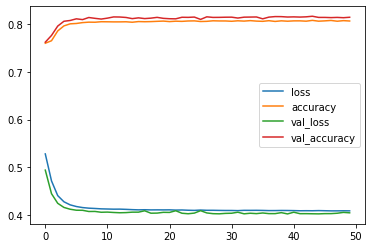

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(12, activation='relu', input_shape=(4,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs=50
)

history_to_plot = pd.DataFrame(history.history)
history_to_plot.plot()

print('')
print(f'Simple Neural Network = {model.evaluate(X_test, y_test)}')

### Every models have around 80% accuracy. But Neural Network and achieved best accuracy 81%. To achieve better accuracy it can be necessary to take more variables such as race, occupation etc. but first this data must be cleaned and converted to numeric